In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mygene

In [4]:
def analyze_cell_lines(cell_lines_times):
    for cell_line_time in cell_lines_times:
        # Load data
        counts, deseq, desingle = load_data(cell_line_time)

        # Preprocess data
        expr_single, expr_pseudo, deseq, lfc_single, lfc_pseudo, desingle = \
        preprocess_data(counts, deseq, desingle)

        # Plot and save data
        plot_data(expr_single, expr_pseudo, deseq, lfc_single, lfc_pseudo, desingle,
                 cell_line_time)

In [5]:
def plot_data(single, pseudo, deseq, lfc_single, lfc_pseudo, desingle,
             figure_name):
    fig, axs = plt.subplots(3, 2, figsize=(16, 32))
    fig.suptitle(figure_name)

    fig.subplots_adjust(hspace=0.3)
    for i in range(3): 
        
        expr_single = single[single[first_col_name] == single[first_col_name][i]]
        expr_pseudo = pseudo[pseudo[first_col_name] == pseudo[first_col_name][i]]
    
    
        lfc_s = desingle[desingle.index.isin(lfc_single)].log2FoldChange[i]
        lfc_s = round(lfc_s, 3)
    
        ax1 = axs[i][0]
        ax1.set_title(f'DEsingle, key_0={lfc_s}')
        ax1.set_title(lfc_s)
        sns.barplot(expr_single, x=first_col_name, y='value', hue='var', ax=ax1)
    
    
        lfc_p = deseq[deseq.index.isin(lfc_pseudo)].log2FoldChange[i] # lfc of ith gene in pseudobulk
        lfc_p = round(lfc_p, 3)
        
        
        ax2 = axs[i][1]
        ax2.set_title(f'Pseudobulk, key_0={lfc_p}')
    
        ax2.set_title(lfc_p)

        sns.barplot(expr_pseudo, x=first_col_name, y='value', hue='var', ax=ax2)
        fig.savefig(f'output_graphs/{figure_name}.jpeg')

In [6]:
def load_data(cell_line_time):
    # Load the three datasets for the given cell line
    counts = rename_first_column(pd.read_csv(f"{cell_line_time}/counts.csv"))
    deseq = rename_first_column(pd.read_csv(f"{cell_line_time}/deseq.csv"))
    desingle = rename_first_column(pd.read_csv(f"{cell_line_time}/desingle.csv"))
    
    return counts, deseq, desingle

In [7]:
first_col_name = 'gene_id'
def rename_first_column(df):
    first_column_name = df.columns[0]
    df = df.rename(columns={first_column_name: first_col_name})
    return df

In [8]:
def preprocess_data(counts, deseq, desingle):
    # Preprocess the data
    
    # DEsingle preprocessing
    desingle = desingle[(desingle['pvalue.adj.FDR'] < 0.01) & (desingle['norm_foldChange'].abs() > 1)]
    desingle_copy = desingle.copy()
    desingle_copy.loc[:, 'log2FoldChange'] = np.log2(desingle_copy['norm_foldChange'])
    desingle = desingle_copy
    desingle = desingle.sort_values(by='chi2LR1', ascending=False, key=abs)
    
    # add gene symbol instead of ens id
    geneSyms = mg.querymany(desingle.index, scopes='ensembl.gene')
    gene_syms = pd.DataFrame(geneSyms)
    desingle['symbol'] = gene_syms['symbol']
    
    top_single = desingle.head(5).index
    
    # DESeq preprocessing
    deseq = deseq[(deseq['padj'] < 0.01)]
    deseq = deseq.sort_values(by='log2FoldChange', ascending=False, key=abs)
    deseq.index = deseq[first_col_name]
    
    geneSyms1 = mg.querymany(deseq.index, scopes='ensembl.gene')
    gene_syms1 = pd.DataFrame(geneSyms1)
    deseq['symbol'] = gene_syms1['symbol']
    
    top_pseudo = deseq.head(5).index
    
    # Filter counts for top_single and top_pseudo
    expr_single = counts[counts[first_col_name].isin(top_single)].copy()
    expr_pseudo = counts[counts[first_col_name].isin(top_pseudo)].copy()
    
    # do melting and grouping
    expr_pseudo = expr_pseudo.melt(first_col_name)
    expr_pseudo['var'] = expr_pseudo['variable'].apply(
        lambda x: 'mock' if '-mock-' in x else 
        'S2' if '-S2-' in x else None)
    
    expr_single = expr_single.melt(first_col_name)
    expr_single['var'] = expr_single['variable'].apply(
        lambda x: 'mock' if '-mock-' in x else 
        'S2' if '-S2-' in x else None)
    
    lfc_single = expr_single[first_col_name].iloc[0:3]
    lfc_pseudo = expr_pseudo[first_col_name].iloc[0:3]
    
    return expr_single, expr_pseudo, deseq, lfc_single, lfc_pseudo, desingle

In [9]:
single = '/Users/sofialuk/Desktop/thesis/05_Expression barplots/calu3_12h/desingle.csv'
pseudo = '/Users/sofialuk/Desktop/thesis/05_Expression barplots/calu3_12h/deseq.csv'
counts = '/Users/sofialuk/Desktop/thesis/05_Expression barplots/calu3_12h/counts.csv'

preprocess_data(counts, pseudo, single)

TypeError: string indices must be integers

querying 1-482...done.
Finished.
1 input query terms found no hit:
	['ENSG00000244693']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-2683...done.
Finished.
4 input query terms found no hit:
	['ENSG00000225932', 'ENSG00000244693', 'ENSG00000271043', 'ENSG00000283486']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


ValueError: Could not interpret input 'symbol'

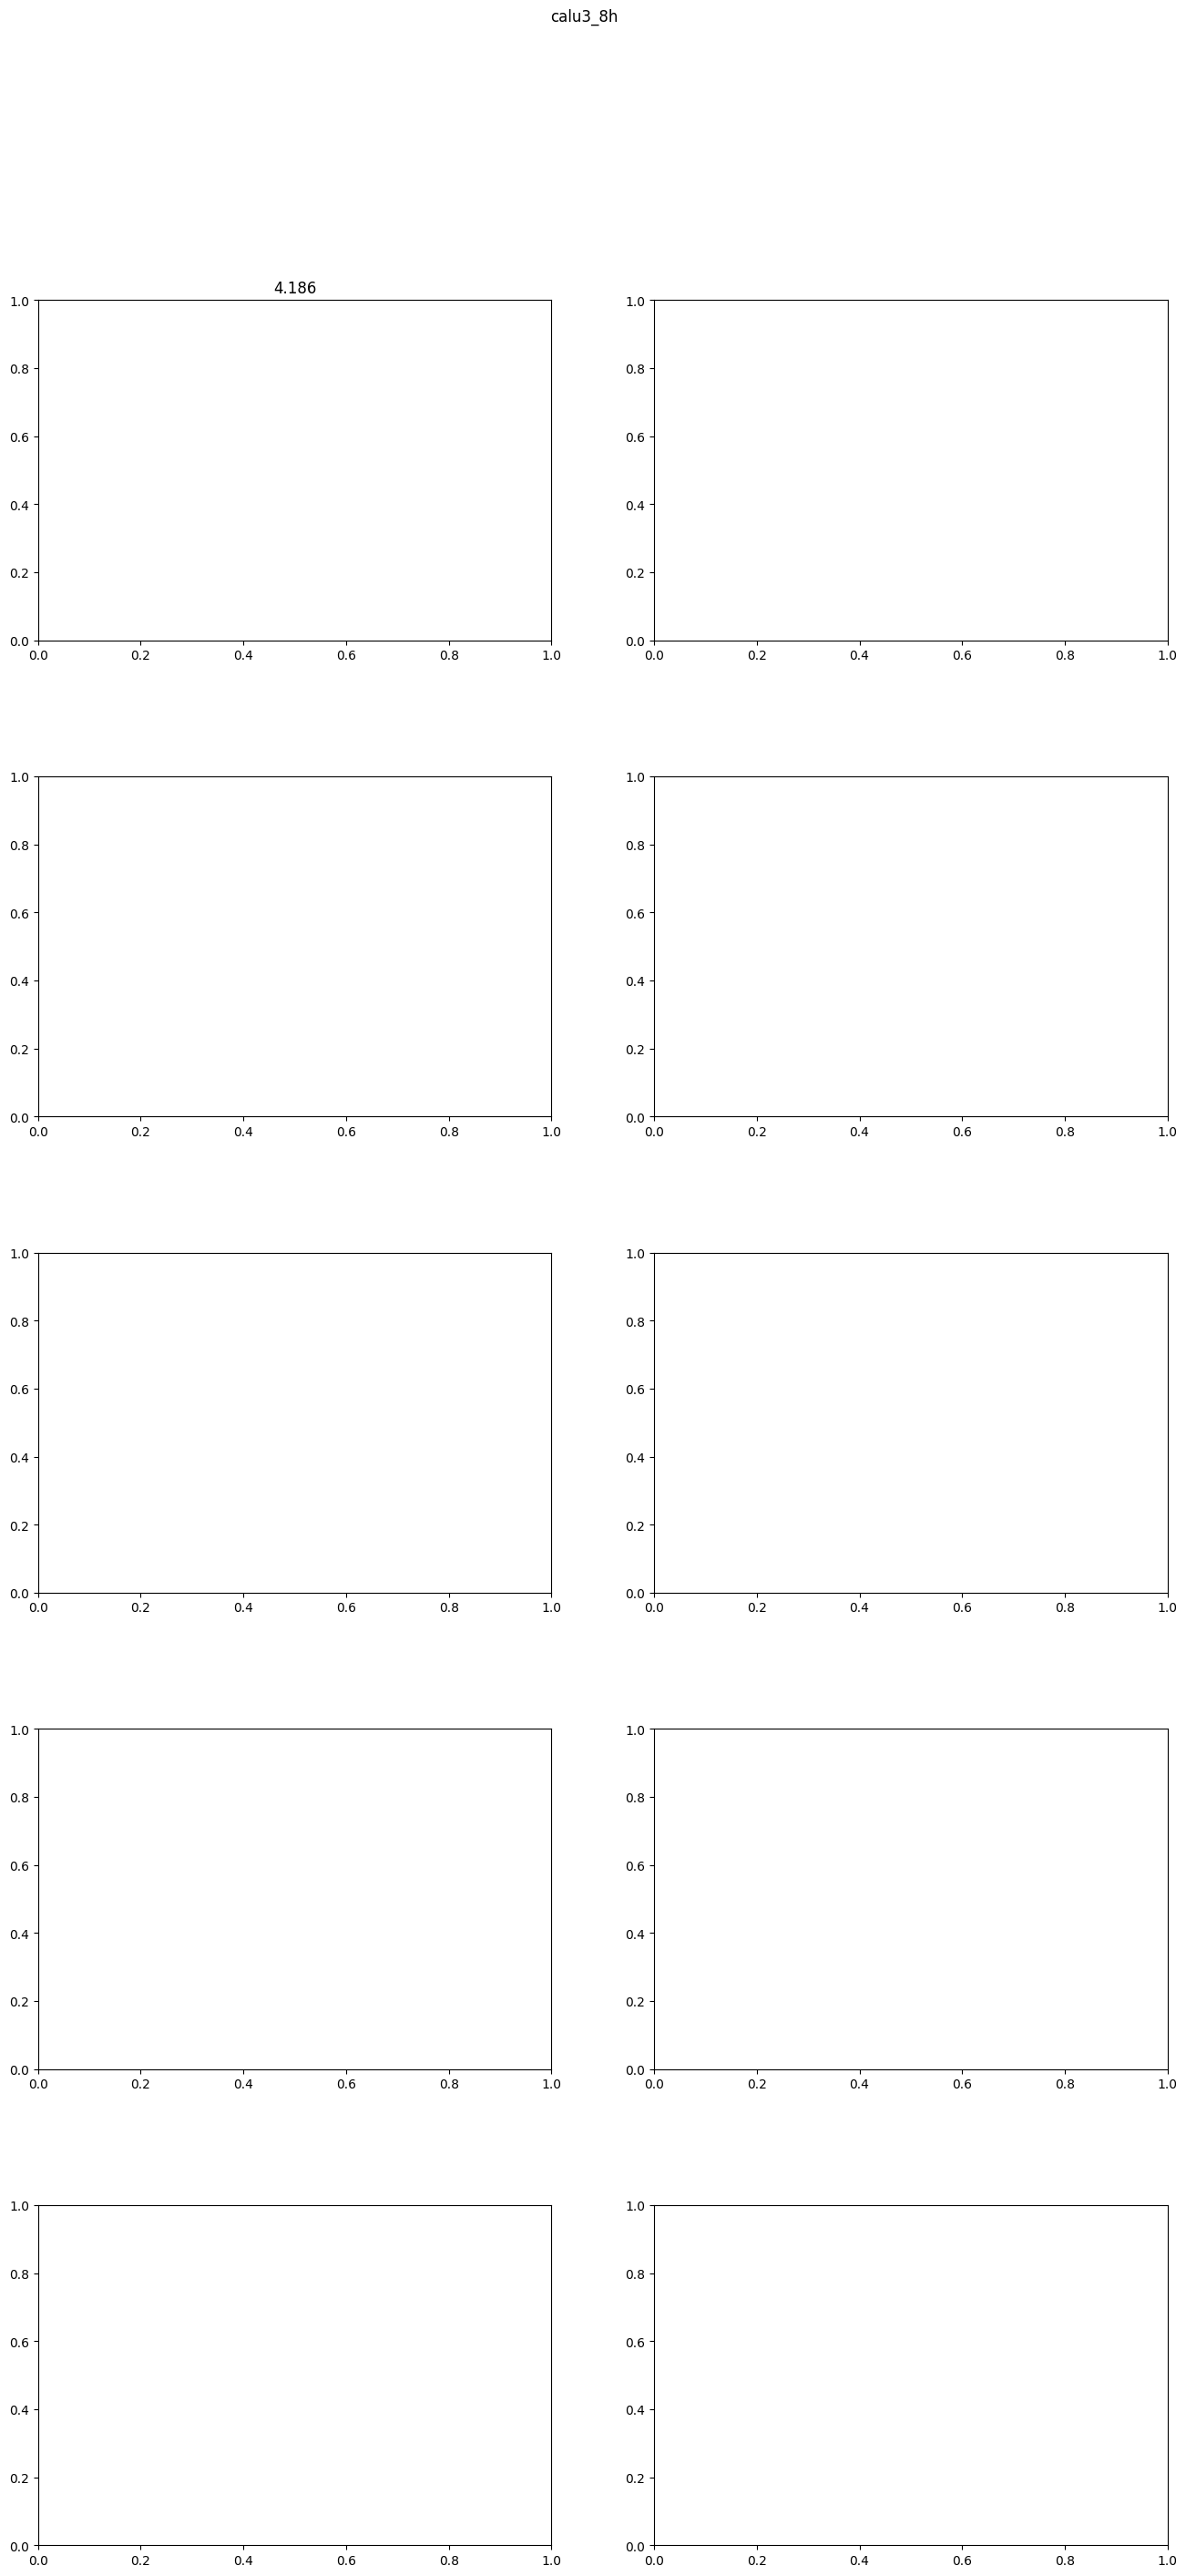

In [31]:
# cell_lines_times = ['calu3_8h', 'calu3_12h', 'h1299_12h', 'h1299_24h', 'h1299_36h']
cell_lines_times = ['calu3_8h', 'calu3_12h']
mg = mygene.MyGeneInfo()

analyze_cell_lines(cell_lines_times)

In [ ]:
mg = mygene.MyGeneInfo()

In [ ]:
single = '/Users/sofialuk/Desktop/thesis/05_Expression barplots/calu3_12h/desingle.csv'

desingle = pd.read_csv(single)
desingle = desingle[(desingle['pvalue.adj.FDR'] < 0.01) & (desingle['norm_foldChange'].abs() > 1)]
desingle_copy = desingle.copy()
desingle_copy.loc[:, 'log2FoldChange'] = np.log2(desingle_copy['norm_foldChange'])
desingle = desingle_copy
desingle = desingle.sort_values(by='chi2LR1', ascending=False, key=abs) 
desingle

In [ ]:
single = '/Users/sofialuk/Desktop/thesis/05_Expression barplots/calu3_12h/desingle.csv'
pseudo = '/Users/sofialuk/Desktop/thesis/05_Expression barplots/calu3_12h/deseq.csv'
counts = '/Users/sofialuk/Desktop/thesis/05_Expression barplots/calu3_12h/counts.csv'

deseq = pd.read_csv(pseudo)
deseq = deseq[(deseq['padj'] < 0.01)]
deseq = deseq.sort_values(by='log2FoldChange', ascending=False, key=abs)

deseq.index = deseq['Unnamed: 0']
top_pseudo = deseq.index


singe = pd.read_csv(single)
singe = singe[(singe['pvalue.adj.FDR'] < 0.01) & (singe['norm_foldChange'].abs() > 1)]

desingle_copy = singe.copy()
desingle_copy.loc[:, 'log2FoldChange'] = np.log2(desingle_copy['norm_foldChange'])
desingle = desingle_copy

desingle = desingle.sort_values(by='chi2LR1', ascending=False, key=abs)
top_single = desingle.index


top_pseudo & top_single

In [ ]:
import pandas as pd
import numpy as np
import os

def get_top_pseudo(folder_path):
    pseudo = os.path.join(folder_path, 'deseq.csv')
    deseq = pd.read_csv(pseudo)
    deseq = deseq[(deseq['padj'] < 0.01)]
    deseq = deseq.sort_values(by='log2FoldChange', ascending=False, key=abs)
    deseq.index = deseq['Unnamed: 0']
    top_pseudo = deseq.index
    return top_pseudo

def get_top_single(folder_path):
    single = os.path.join(folder_path, 'desingle.csv')
    singe = pd.read_csv(single)
    singe = singe[(singe['pvalue.adj.FDR'] < 0.01) & (singe['norm_foldChange'].abs() > 1)]
    desingle_copy = singe.copy()
    desingle_copy.loc[:, 'log2FoldChange'] = np.log2(desingle_copy['norm_foldChange'])
    desingle = desingle_copy
    desingle = desingle.sort_values(by='chi2LR1', ascending=False, key=abs)
    top_single = desingle.index
    return top_single

def get_common_genes(top_pseudo, top_single):
    return top_pseudo & top_single

folder_names = ['calu3_8h', 'calu3_12h', 'h1299_12h', 'h1299_24h', 'h1299_36h']

for folder_name in folder_names:
    folder_path = os.path.join('/Users/sofialuk/Desktop/thesis/05_Expression barplots', folder_name)
    top_pseudo = get_top_pseudo(folder_path)
    top_single = get_top_single(folder_path)
    common_genes = get_common_genes(top_pseudo, top_single)
    

    print(f"Common genes in  {folder_name}: {len(common_genes)}", common_genes)


In [ ]:
folder_names = ['calu3_8h', 'calu3_12h', 'h1299_12h', 'h1299_24h', 'h1299_36h']
folder_dict = {}

for folder_name in folder_names:
    single = f'/Users/sofialuk/Desktop/thesis/05_Expression barplots/{folder_name}/desingle.csv'
    pseudo = f'/Users/sofialuk/Desktop/thesis/05_Expression barplots/{folder_name}/deseq.csv'
    counts = f'/Users/sofialuk/Desktop/thesis/05_Expression barplots/{folder_name}/counts.csv'

    deseq = pd.read_csv(pseudo)
    deseq = deseq[(deseq['padj'] < 0.01)]
    deseq = deseq.sort_values(by='log2FoldChange', ascending=False, key=abs)
    deseq = deseq[deseq['log2FoldChange'].abs() > 1]
    deseq.index = deseq['Unnamed: 0']
    top_pseudo = deseq.index

    singe = pd.read_csv(single)
    singe = singe[(singe['pvalue.adj.FDR'] < 0.01) & (singe['norm_foldChange'].abs() > 1)]
    desingle_copy = singe.copy()
    desingle_copy.loc[:, 'log2FoldChange'] = np.log2(desingle_copy['norm_foldChange'])
    desingle = desingle_copy
    desingle = desingle[(desingle['log2FoldChange'].abs() > 1)]
    desingle = desingle.sort_values(by='chi2LR1', ascending=False, key=abs)
    top_single = desingle.index

    intersection = get_common_genes(top_pseudo, top_single)
    folder_dict[folder_name] = {'top_pseudo': top_pseudo, 'top_single': top_single, 'intersection': intersection}


In [ ]:
folder_dict['calu3_8h']['intersection']